<a href="https://colab.research.google.com/github/nee2shaji/neural-cognitive-modelling/blob/master/fI_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install required packages

%%capture
!pip3 install brian2
!pip3 install --upgrade neurodynex3

In [2]:
# @title Import required packages, libraries

%%capture
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

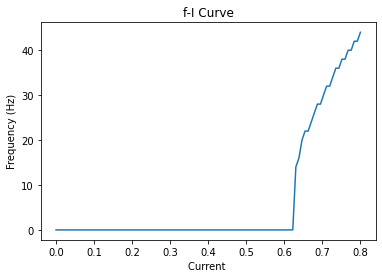

In [3]:
f, I = list(), np.linspace(0,0.8,100)
currStartTime = 0
currEndTime =500
for i in I:
    step_current = input_factory.get_step_current(t_start=currStartTime, t_end=currEndTime, unit_time=b2.ms, amplitude=i * b2.namp)
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms, 
                                                            v_rest = -70 * b2.mV,
                                                            firing_threshold = -45 * b2.mV,
                                                            membrane_resistance = 40 * 1e6 * b2.ohm,
                                                            membrane_time_scale = 15 * b2.ms)
    firingRate = spike_monitor.count[0] / ((currEndTime - currStartTime) * 1e-3)
    f.append(firingRate)
plt.plot(I, f)
plt.title('f-I Curve')
plt.xlabel("Current ")
plt.ylabel("Frequency (Hz)")
plt.show()